<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , roc_curve , auc
from sklearn import metrics

In [3]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 plt.legend()

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset/data.csv')
df.drop(labels=['Unnamed: 32','id'],inplace=True,axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
classes=df['diagnosis'].value_counts()
print("class distribution \n","B:",classes[0]/(classes[0]+classes[1]) *100,"%","\n M:",classes[1]/(classes[0]+classes[1]) *100,"%" )

class distribution 
 B: 62.741652021089635 % 
 M: 37.258347978910365 %


In [7]:
cleanup_nums = {"diagnosis":{"M": 1, "B": 0}}
df = df.replace(cleanup_nums)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Test-Train Split

In [8]:
y=df.iloc[:,0:1].values.ravel()
x=df.iloc[:,1:31]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

Scaling

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_sca_train=scaler.transform(x_train)
x_sca_test=scaler.transform(x_test)

# Model1

In [10]:
model1=LinearSVC(random_state=0,penalty='l1', loss='squared_hinge', dual=False)    
model1.fit(x_sca_train,y_train)
y_pred=model1.predict(x_sca_train)

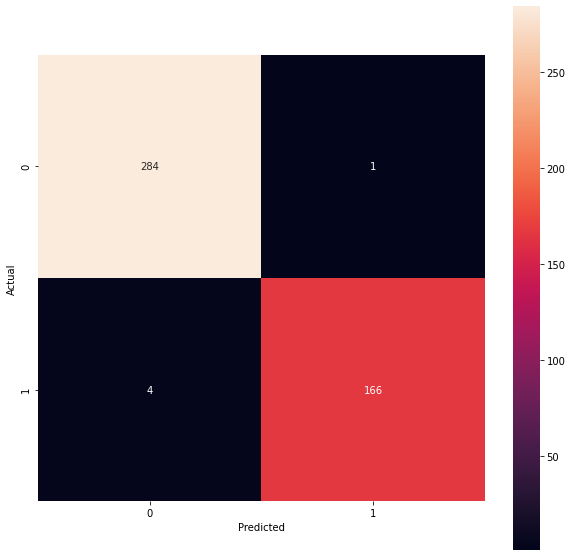

In [11]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [12]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       285
           1       0.99      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [13]:
from sklearn.model_selection import cross_val_score
print("Cross Val Score:",cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1'))
print("Cross Val Mean:",np.round(np.mean(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),3))
print("Cross Val Std:",np.round(np.std(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),3))

Cross Val Score: [0.97345133 0.96363636 0.93913043]
Cross Val Mean: 0.959
Cross Val Std: 0.014


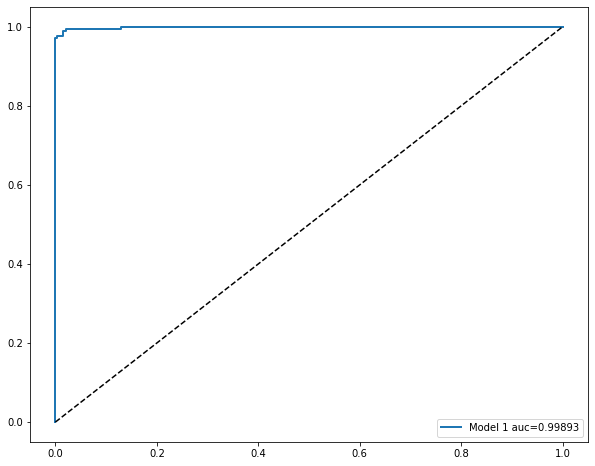

In [14]:
scores=model1.decision_function(x_sca_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 1"+" auc="+area)

# Model 2

In [15]:
model2=LinearSVC(random_state=0,penalty='l1',class_weight="balanced", loss='squared_hinge', dual=False,max_iter=10000)    
model2.fit(x_sca_train,y_train)
y_pred=model2.predict(x_sca_train)

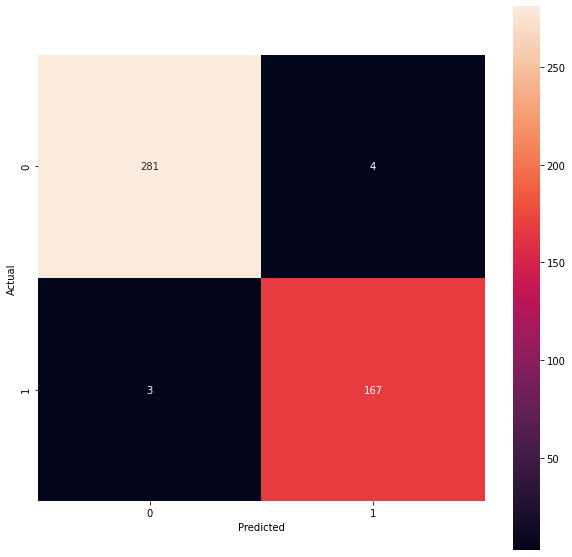

In [16]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [17]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.98      0.98      0.98       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [18]:
from sklearn.model_selection import cross_val_score
print("Cross Val Score:",cross_val_score(model2, x_sca_train, y_train, cv=3,scoring='f1'))
print("Cross Val Mean:",np.round(np.mean(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),3))
print("Cross Val Std:",np.round(np.std(cross_val_score(model1, x_sca_train, y_train, cv=3,scoring='f1')),3))

Cross Val Score: [0.98245614 0.95495495 0.93103448]
Cross Val Mean: 0.959
Cross Val Std: 0.014


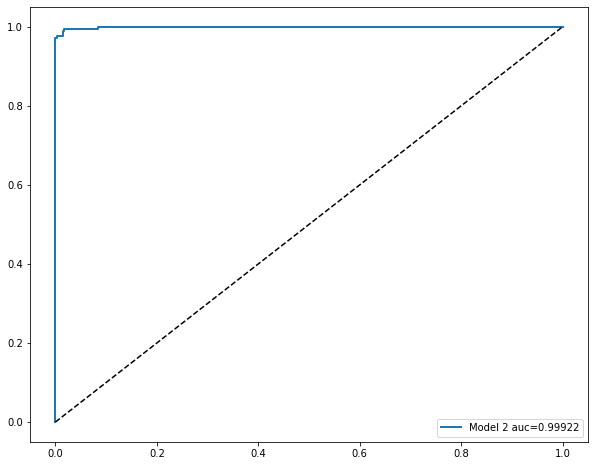

In [19]:
scores=model2.decision_function(x_sca_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

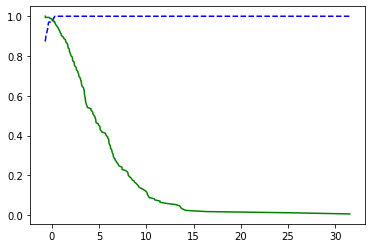

In [20]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

Model Selection and performance on test data

In [21]:
pred_mod1=model1.predict(x_sca_test)
pred_mod2=model2.predict(x_sca_test)

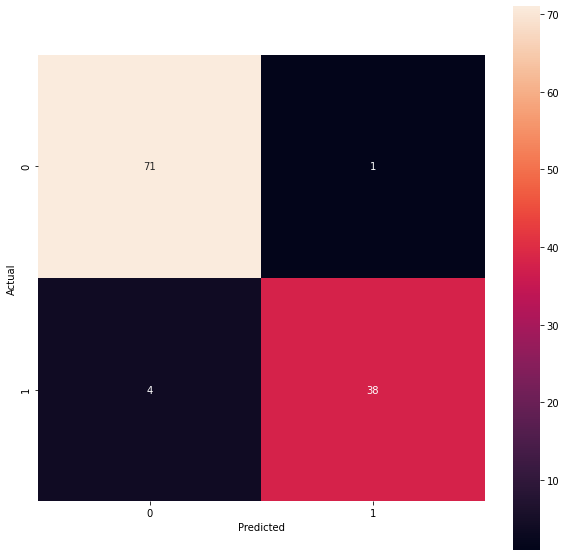

In [22]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_test, pred_mod1),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [24]:
print(metrics.classification_report(y_test, pred_mod1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



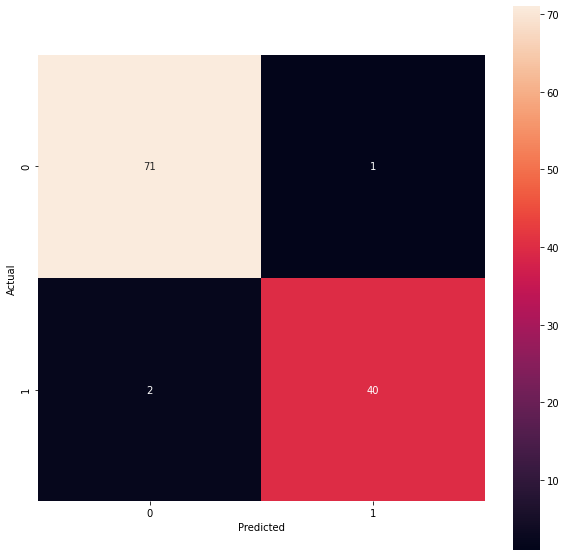

In [25]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_test, pred_mod2),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [27]:
print(metrics.classification_report(y_test, pred_mod2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Conclusion: Model 2 will be the best model for classification